In [1]:
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import numpy as np
import os
import zipfile
import xlrd
import plotly.express as px
import re
from scipy import stats as st
import pingouin as pg

sns.set(rc={'figure.figsize': (16,6)}, style='whitegrid')

In [2]:
df_old = pd.read_csv(r'datasets/5_task_1.csv')

In [3]:
df_new = pd.read_csv(r'datasets/5_task_2.csv')

In [4]:
df_old.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [5]:
df_new.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [7]:
df_old.describe()

,id,events
count,30000.000000,30000.000000
mean,14999.500000,31.554500
std,8660.398374,10.878761
min,0.000000,-7.000000
25%,7499.750000,24.000000
50%,14999.500000,31.000000
75%,22499.250000,39.000000
max,29999.000000,75.000000


In [8]:
df_old.isna().sum()

id        0
group     0
events    0
dtype: int64

In [9]:
df_old.nunique()

id        30000
group         3
events       81
dtype: int64

In [10]:
pg.homoscedasticity(data=df_old, dv='events', group='group', )

,W,pval,equal_var
levene,2.26226,0.104133,True


In [15]:
pg.normality(data=df_old, dv='events', group='group', method='normaltest')

,W,pval,normal
group,,,
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

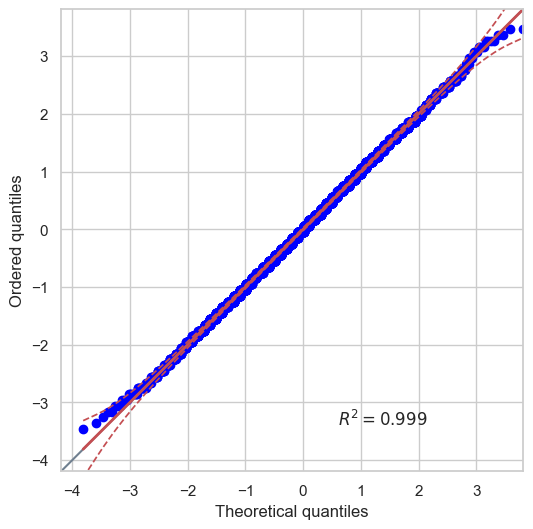

In [19]:
pg.qqplot(df_old.query('group == "C"').events)

<Axes: xlabel='events', ylabel='Count'>

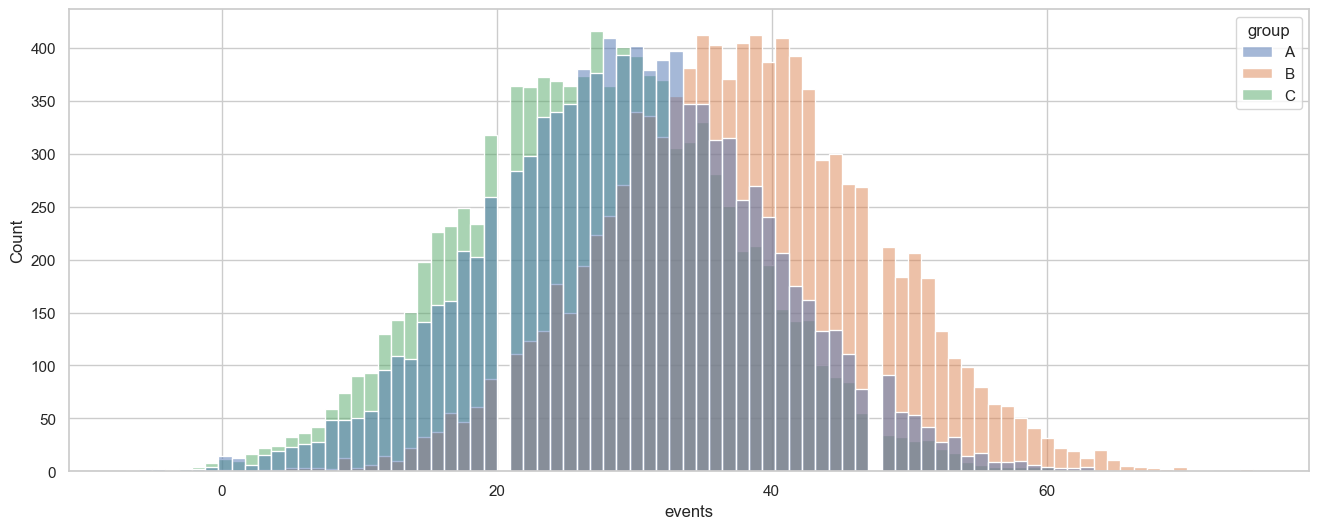

In [12]:
sns.histplot(data=df_old, x='events', hue='group')

In [20]:
pg.anova(data=df_old, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [22]:
pg.pairwise_tukey(data=df_old, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


<Axes: xlabel='group', ylabel='events'>

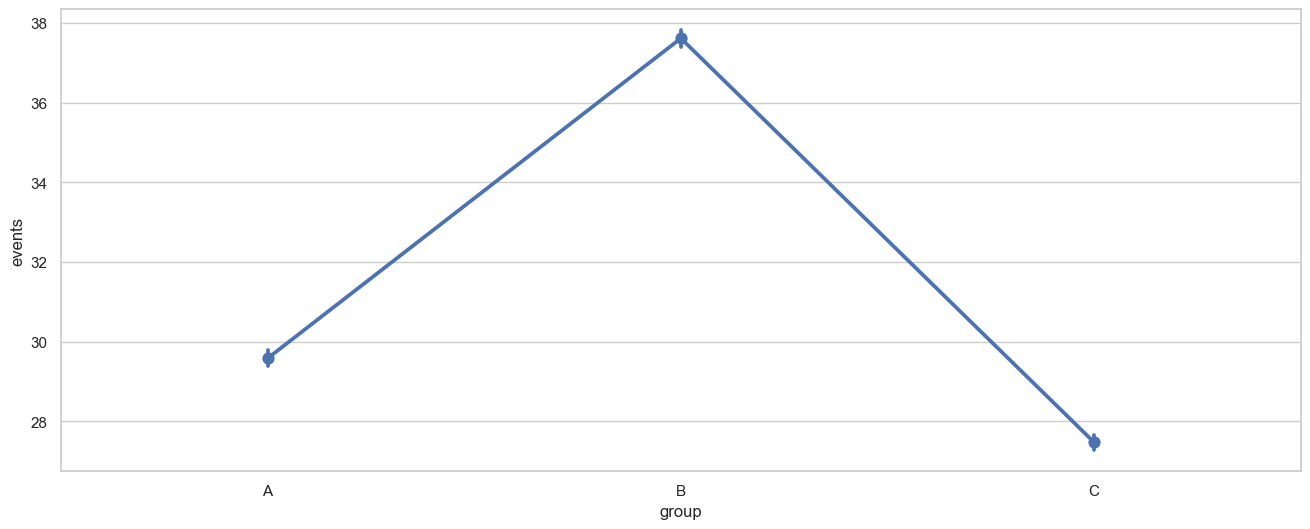

In [23]:
sns.pointplot(data=df_old, x='group', y='events')

In [24]:
df_new.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


<Axes: xlabel='events', ylabel='Count'>

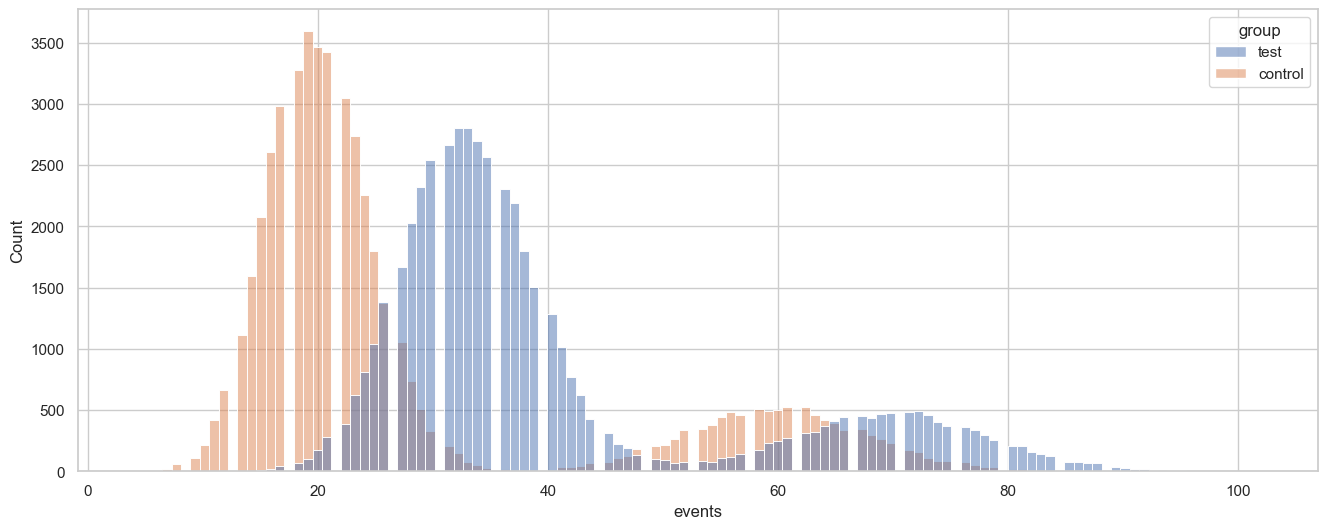

In [25]:
sns.histplot(data=df_new, x='events', hue='group')

<Axes: xlabel='events', ylabel='Count'>

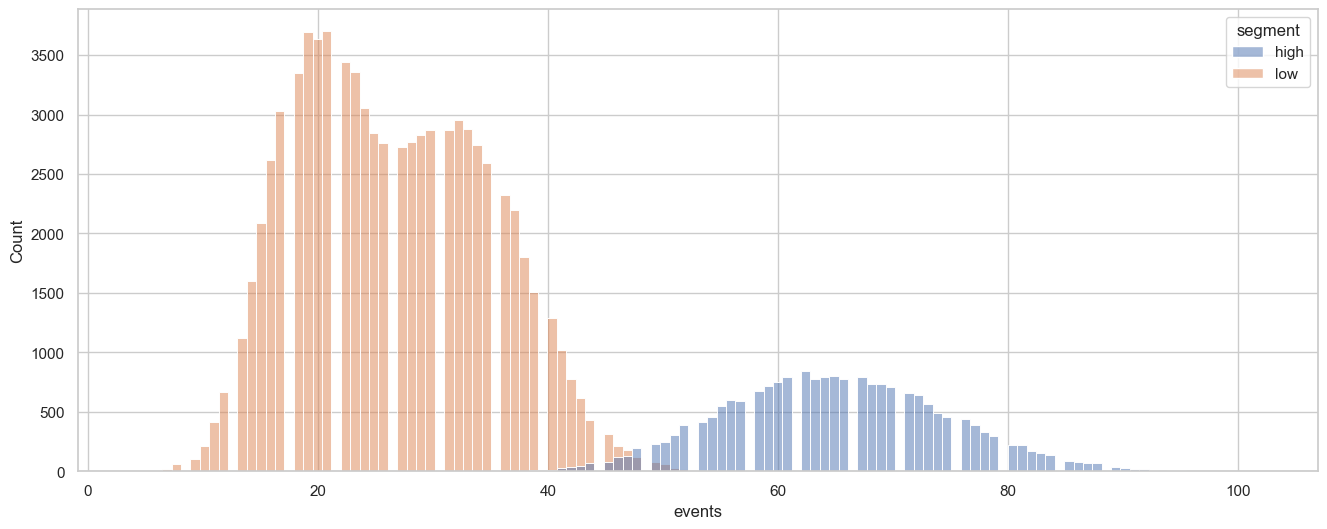

In [26]:
sns.histplot(data=df_new, x='events', hue='segment')

In [27]:
df_new.isna().sum()

id         0
group      0
segment    0
events     0
dtype: int64

In [28]:
df_new.nunique()

id         100000
group           2
segment         2
events         97
dtype: int64

In [29]:
pg.normality(data=df_new, dv='events', group='group', method='normaltest')

,W,pval,normal
group,,,
test,9409.848695,0.0,False
control,10546.476411,0.0,False


In [30]:
pg.normality(data=df_new, dv='events', group='segment', method='normaltest')

,W,pval,normal
segment,,,
high,97.557119,6.542456e-22,False
low,4859.376919,0.000000e+00,False


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

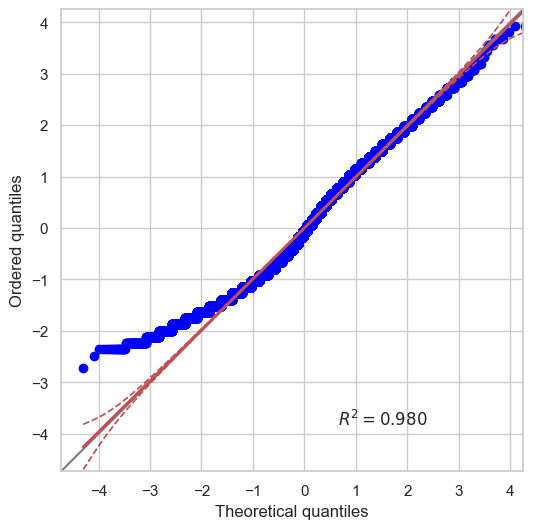

In [34]:
pg.qqplot(df_new.query('segment == "low"').events)

In [36]:
pg.homoscedasticity(data=df_new, dv='events', group='group', method='levene')

,W,pval,equal_var
levene,2.544005,0.110717,True


In [39]:
pg.homoscedasticity(data=df_new, dv='events', group='segment', method='levene')

,W,pval,equal_var
levene,335.193107,9.423048e-75,False


In [43]:
pg.anova(data=df_new, dv='events', between=['segment', 'group'])

,Source,SS,DF,MS,F,p-unc,np2
0,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
1,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
2,segment * group,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [41]:
pg.pairwise_tukey(data=df_new, dv='events', between=['segment', 'group'])

IndexError: arrays used as indices must be of integer (or boolean) type